# Flexible Price Economy Problem Set (PS3)

## Short-Run Economic Fluctuations: Flexible-Price Macroeconomics

This assignment is due on Sunday 2-25-2018 at 5 PM. The purpose of the notebook is to enforce understanding of the flexible price model, starting with applications of production functions and moving into income-expenditure models. The assignment covers both conceptual and technical questions regarding chapters 7, 8, and 9 in the textbook.

### Table of Contents

1 - [Circular Flows and General Gluts](#chapter 7)

2 - [The Full-Employment Long-Run Flexible-Price Macroeconomy: Behavioral Relationships](#chapter 8)

3 - [The Flexible-Price Economy](#chapter 9)

Run the cells below, and let's get started!

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('flex_price.ok')
#_ = ok.auth(inline=True)

ModuleNotFoundError: No module named 'client'

## Chapter 7: Circular Flows and General Gluts <a id='chapter 7'></a>

#### Sources of Price Stickiness

$1.$ Think about the four possible source of price stickiness: money illusion, "fairness" considerations, misperceptions of price changes, and menu costs. What have you read or seen in the past two months that strike you as examples of any of these four phenomena? Which of the four strikes you as most likely to be the most important? Be brief!—one paragraph only.

$Answer:$

#### Institutional Sources of Price Stickiness 

$2.$ What changes in the economy's institutions can you think of that would diminish price stickiness and increase price flexibility? What advantage in terms of the size of the business cycle would you expect to follow from such changes in institutions? What disadvantages do you think that such institutional changes might have? One paragraph only.

$Answer:$

#### Jean Baptiste Say 

$3.$ In 1803, Say claimed that because nobody makes anything without intending to use it or sell it, and nobody sells anything without intending to buy something else, that there could be no general shortage of demand in an economy-- that there could be a planned excess of supply of some commodities, but it would be balanced by a planned excess of demand of some other commodities. Was he wrong? Why was he wrong?

$Answer:$

## Chapter 8: Building Blocks of the Flexible Price Model <a id='chapter 8'></a>

#### Visualizing production functions
Consider an economy bound to the following production function:

$$
Y=K^α(EL)^{(1−α)} 
$$

$1$. First, create a function `prod()` that takes as inputs K, α, E and L, and returns the quantity of potential output Y. You will use it later to visualize the trends in production as these parameters are changed.

In [3]:
def prod(K, alpha, E, L):
    return (K ** alpha) * (E * L) ** (1 - alpha) # your code here

$2$. Next, we want to observe how each variable affects the potential output Y. Run the block below and use the sliders to adjust each of the variables. How does the potential output Y change as you vary K, α, E, and L? Give a brief description of each variable's effect on the Y value.

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(prod,
         K = widgets.IntSlider(min=0,max=1000000,step=1,value=500000), 
         alpha = widgets.FloatSlider(min=0,max=1,step=0.1,value=0.5), 
         E = widgets.IntSlider(min=0,max=1000000,step=1,value=500000), 
         L = widgets.IntSlider(min=0,max=1000000,step=1,value=500000))

<function __main__.prod>

$Answer: $

$3$. Lastly, plot the production function with respect to capital stock K and potential output Y, holding the supply of labor L and the efficiency of labor E fixed. Once you finish the function, we have provided you with input sliders for α, E, and L. How does the production function with respect to K and Y change as α, E, and L vary?

In [5]:
def graph_prod_K(alpha, E, L):
    K = np.linspace(0, 1000000, 1000000) # a range of K from 0 to 1000000 that we are using to plot the production function.     
    production_function_k = prod(K, alpha, E, L) # Your code here
    plt.plot(K, production_function_k)
    plt.xlabel('Capital Stock (k)')
    plt.ylabel('Real GDP (Y)')
    plt.show()

interact(graph_prod_K,
         alpha = widgets.FloatSlider(min=0,max=1,step=0.1,value=0.5), 
         E = widgets.IntSlider(min=0,max=1000000,step=1,value=500000), 
         L = widgets.IntSlider(min=0,max=1000000,step=1,value=500000))

<function __main__.graph_prod_K>

$3.$ While playing with the sliders, you will notice that the `alpha` value determines the shape (slope and curvature) of the graph while `E` and `L` simply control scaling. In just a few sentences, and using a mathematical argument, give your best explanation as to why this is. (Hint: Examine the production function and think about what each variable is doing)

$Answer:$

#### Labor market equilibrium

$1$. Suppose the demand curve for labor  $f$ and supply curve for labor  $g$ are given below.

$$
f = 10 - 4L
$$

$$
g = 1 + 5L
$$

What is the equilibrium wage? ($L$ is thousands of hours of labor per week)

$Answer:$

$2$. Fill in your code below to plot the two curves. Do the curves make sense? What is the intersection point of the two lines? Are they the same with the values you calculated from the last problem?

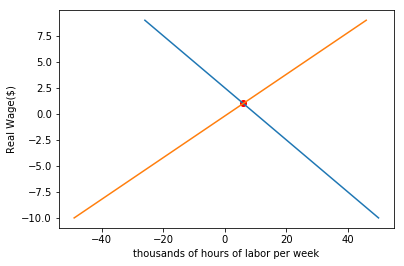

Equilibrium wage is: $1.0
Employment value is: 6 thousands of hours per week


In [6]:
def demand_for_labor(L):
    return 10 - 4*L # Your code here

def supply_for_labor(L):
    return 1 + 5*L # Your code here

L = np.arange(-10, 10, 1)
f = demand_for_labor(L)
g = supply_for_labor(L)

plt.plot(f, L)
plt.plot(g, L)
plt.xlabel("thousands of hours of labor per week")
plt.ylabel("Real Wage($)")
y_intersect = 0
for i in np.arange(0, len(f)):
    if (f[i] == g[i]):
        y_intersect = f[i]
x_intersect = (y_intersect - 1) / 5 
plt.scatter(y_intersect, x_intersect, color = "red")
plt.show()
print("Equilibrium wage is: $" + str(x_intersect))
print("Employment value is: " + str(y_intersect) + " thousands of hours per week")

## Chapter 9: Equilibrium in the Flexible Price Model <a id='chapter 9'></a>

#### Adding Up National Product

The simple income-expenditure model relies on the relationship between Planned Total Expenditure (PE) and real GDP (Y) to gauge economic equilibrium. If these two values become unequal, then the economy is no longer in equilibrium. It's time to enforce our understanding of the flex price model and how the component elements come into play.

To calculate PE, one must simply add up *consumption spending* C, *investment spending* I, *government spending* G, and *net exports* NX. In simpler terms, 

$$
PE=C+I+G+NX 
$$



$1.$ The first parameter in calculating `PE`, consumption spending `C`, is itself reliant on several parameters. These are GDP `Y`, tax rate `t`, and `C0` and `Cy`, which determine baseline consumption and unit increase in consumption per unit increase in `Y`. `C` is calculated as such:

$$
C=C_0+C_y({1-t})Y
$$

**Write two functions**, one that will calculate consumption spending and another that will calculate planned total expenditure *using your consumption value*.

In [7]:
def consumption(c0, cy, t, y):
   # your code here
    return c0 + cy*(1-t)*y

def planned_expenditure(c, i, g, nx):
    # your code here
    return c + i + g + nx

$2.$ Now we will use your functions to calculate Planned Total Expenditure for a few values of C, I, G, and NX. Using the provided array of GDP values, first calculate consumption when C0 = `1.43` trillion, Cy = `.73`, and t = `0.27`. Then, using the given values of I, G, and NX along with your consumption calculation, compute an array of PE values.

In [11]:
# range of GDP values
gdp = np.arange(1e9, 5e9+1e8, 1e8) # range of GDP values

c = consumption(1.43e9, .73, .27, gdp) # your code here

# Values of i, g, and nx to be used in calculating pe
i = 1.8e8
g = 1.4e8
nx = 8.2e7

pe = planned_expenditure(c, i, g, nx) # your code here

$3.$ Now that you have a list of GDP values, along with a corresponding list of PE values, it's time to **plot them against one another**. Do that in the following code block, and make sure to label your axes so your plot is easily legible.

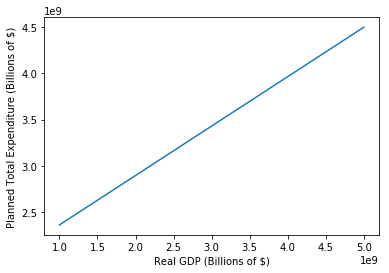

In [12]:
# your code here
plt.plot(gdp, pe)
plt.xlabel("Real GDP (Billions of $)")
plt.ylabel("Planned Total Expenditure (Billions of $)")

$4.$ The diagonal line in your plot represents PE as a function of national income. Paste your code from above in the following cell block, then plot an additional line that represents a 1:1 relation between GDP and PE. This line, you remember, will be used to gauge economic equilibrium. Add a legend to your plot that distinguishes between your two lines (there are several ways to do this, but try using the `label` argument within `.plot`).

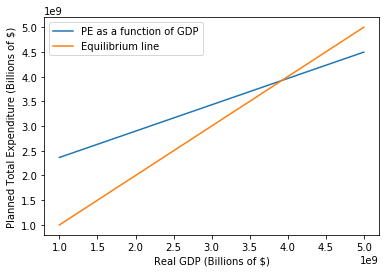

In [13]:
# your code here
plt.plot(gdp, pe, label="PE as a function of GDP")
plt.xlabel("Real GDP (Billions of $)")
plt.ylabel("Planned Total Expenditure (Billions of $)")
plt.plot(gdp, gdp, label="Equilibrium line")
plt.legend()

$5.$ What is the plot that you just made called? What is the name and significance of the intersection point of the two lines?

$Answer: $

$6.$ Now, remember that when prices are sticky, planned total expenditure is a good measure of real GDP. Why is this? When prices are not sticky, why would this no longer hold true? What does Keynes have to say about the role that planned expenditure plays in potential production?

$Answer:$ 

Good job, you're done now!

In [ ]:
# Don't forget to run this cell to submit your homework!
#_ = ok.submit()